In [52]:
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch
from torch import nn
#1st check how make_moons looks like
x,y=make_moons(n_samples=1000,noise=0.2)

df_by_sklearn=pd.DataFrame(x,columns=["x1","x2"])
df_by_sklearn["label"]=y

df_by_sklearn



,x1,x2,label
0,1.923100,0.621919,1
1,0.947909,0.503905,0
2,0.860782,0.128770,0
3,1.314218,-0.442779,1
4,0.785726,-0.308372,1
...,...,...,...
995,0.364185,1.103418,0
996,0.003967,1.026579,0
997,1.908772,-0.438453,1
998,0.364130,0.416040,0


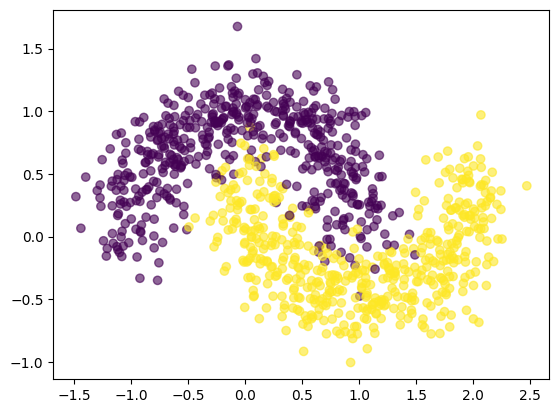

In [53]:
import matplotlib.pyplot as plt

plt.scatter(df_by_sklearn['x1'], df_by_sklearn['x2'], c=df_by_sklearn['label'],alpha=0.6)
plt.show()

In [54]:
#now lets create our dataset without use of sklearn dataset

def dataset_Creation(n_samples,noise):
    n=n_samples//2
    theta = np.linspace(0, np.pi, n)
    x1=np.cos(theta)+np.random.normal(0, noise, n)
    x2=np.sin(theta)+np.random.normal(0, noise, n)

    first_half=pd.DataFrame(x1,columns=["x1"])
    first_half["x2"]=x2
    first_half["label"]= 0

    #second half

    theta = np.linspace(0, np.pi, n)
    x1=1-np.cos(theta)+np.random.normal(0, noise, n)
    x2=-np.sin(theta)-0.5+np.random.normal(0, noise, n)

    second_half=pd.DataFrame(x1,columns=["x1"])
    second_half["x2"]=x2
    second_half["label"]= 1

    our_dataset=pd.concat([first_half,second_half])
    our_dataset=our_dataset = our_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
    return our_dataset

np.random.seed(1337)

df_n_point_one=dataset_Creation(1000,0.1)
df_n_point_two=dataset_Creation(1000,0.2)
df_n_point_three=dataset_Creation(1000,0.3)




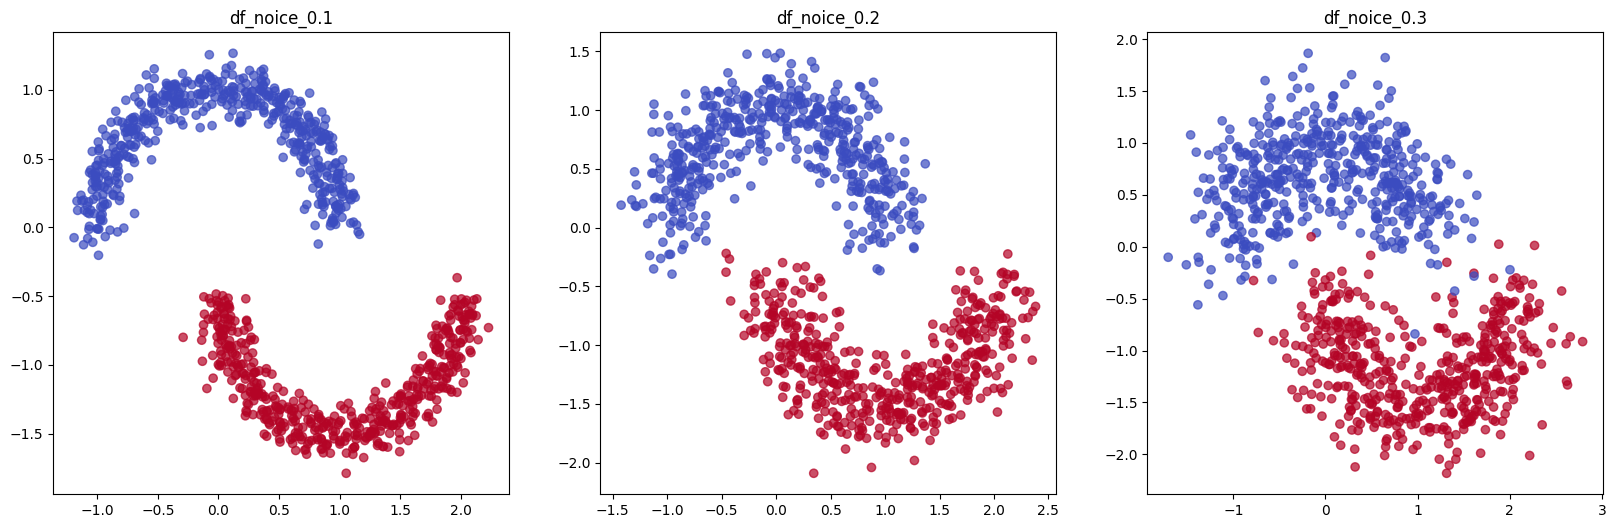

<Figure size 1000x600 with 0 Axes>

In [55]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("df_noice_0.1")
plt.scatter(df_n_point_one['x1'], df_n_point_one['x2'], c=df_n_point_one['label'],alpha=0.7,cmap="coolwarm")
plt.subplot(1,3,2)
plt.title("df_noice_0.2")

plt.scatter(df_n_point_two['x1'], df_n_point_two['x2'], c=df_n_point_two['label'],alpha=0.7,cmap="coolwarm")
plt.subplot(1,3,3)
plt.title("df_noice_0.3")

plt.scatter(df_n_point_three['x1'], df_n_point_three['x2'], c=df_n_point_three['label'],alpha=0.7,cmap="coolwarm")
plt.figure(figsize=(10,6))
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
'''df_n_point_two = df_n_point_two.sample(frac=1, random_state=1337).reset_index(drop=True)
x=df_n_point_two.iloc[:,:-1]
y=df_n_point_two["label"]
xtrain=x.iloc[:500]
xtest=x.iloc[500:]
ytrain=y.iloc[:500]
ytest=y.iloc[500:]



xval=xtrain.iloc[:100]
yval=ytrain.iloc[:100]
xtrain=xtrain.iloc[100:]
ytrain=ytrain.iloc[100:]


scaler.fit(xtrain)          # fit on training set only
xtrain_scaled = scaler.transform(xtrain)
val_xtrain_scaled = scaler.transform(xval)
xtest_scaled = scaler.transform(xtest)'''

#df_n_point_one
#df_n_point_two
#df_n_point_three
def spliting(i):
    x=i.iloc[:,:-1]
    y=i["label"]
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=1337)

    xtrain, xval, ytrain, yval = train_test_split(
        xtrain, ytrain, test_size=0.2, random_state=1337
    )

    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain)
    val_xtrain_scaled = scaler.transform(xval)
    xtest_scaled = scaler.transform(xtest)


    #  Step 5: Convert to tensors
    X_train_t = torch.tensor(xtrain_scaled, dtype=torch.float32)
    y_train_t = torch.tensor(ytrain, dtype=torch.float32).view(-1, 1)
    X_val_t = torch.tensor(val_xtrain_scaled, dtype=torch.float32)
    y_val_t = torch.tensor(np.array(yval), dtype=torch.float32).view(-1, 1)

    X_test_t = torch.tensor(xtest_scaled, dtype=torch.float32)
    y_test_t = torch.tensor(np.array(ytest), dtype=torch.float32).view(-1, 1)
   

    return X_train_t,y_train_t,X_val_t,y_val_t,X_test_t,y_test_t

X_train_t,y_train_t,X_val_t,y_val_t,X_test_t,y_test_t=spliting(df_n_point_two)
X_train_01_t,y_train_01_t,X_val_01_t,y_val_01_t,X_test_01_t,y_test_01_t=spliting(df_n_point_one)
X_train_03_t,y_train_03_t,X_val_03_t,y_val_03_t,X_test_03_t,y_test_03_t=spliting(df_n_point_three)




Validation Accuracy: 0.880
Test Accuracy (noise=0.1): 0.906
Test Accuracy (noise=0.2): 0.888
Test Accuracy (noise=0.3): 0.906


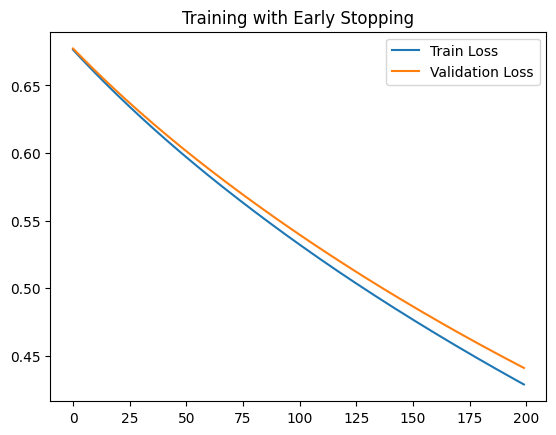

In [57]:
class MLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=8):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.output(x)
        return x


#Early stopping training
model = MLP(input_dim=2, hidden_dim=8)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

best_val_loss = float('inf')
patience = 50
wait = 0
best_weights = None
train_losses, val_losses = [], []

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        val_loss = criterion(val_pred, y_val_t)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        best_weights = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f" Early stopping at epoch {epoch}")
            break

model.load_state_dict(best_weights)

def accuracy(y_true, y_pred_logits):
    preds = (torch.sigmoid(y_pred_logits) > 0.5).float()
    return (preds.eq(y_true).sum() / len(y_true)).item()

model.eval()
with torch.no_grad():
    acc_val = accuracy(y_val_t, model(X_val_t))
    acc_test_02 = accuracy(y_test_t, model(X_test_t))

    acc_test_01 = accuracy(y_test_01_t, model(X_test_01_t))
    acc_test_03 = accuracy(y_test_03_t, model(X_test_03_t))

print(f"Validation Accuracy: {acc_val:.3f}")
print(f"Test Accuracy (noise=0.1): {acc_test_01:.3f}")
print(f"Test Accuracy (noise=0.2): {acc_test_02:.3f}")

print(f"Test Accuracy (noise=0.3): {acc_test_03:.3f}")

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Training with Early Stopping")
plt.show()
model_es = model



=== L1 Results Summary ===
λ=1e-06    Val AUROC=0.9764 | Layer1=0.000, Output=0.000
λ=3e-06    Val AUROC=0.9964 | Layer1=0.000, Output=0.000
λ=1e-05    Val AUROC=0.9632 | Layer1=0.000, Output=0.000
λ=3e-05    Val AUROC=0.9960 | Layer1=0.000, Output=0.000
λ=0.0001   Val AUROC=0.9884 | Layer1=0.000, Output=0.000
λ=0.0003   Val AUROC=0.9804 | Layer1=0.000, Output=0.000

Best λ = 3e-06 with Validation AUROC = 0.9964


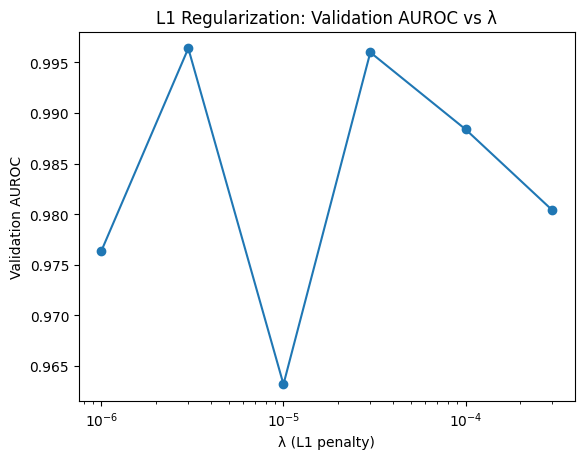

In [58]:
import numpy as np
import torch
from torch import nn
from sklearn.metrics import roc_auc_score

torch.manual_seed(1337)
np.random.seed(1337)


def train_with_L1(model, X_train_t, y_train_t, X_val_t, y_val_t, lam, patience=50, lr=0.01):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    best_val_loss = float("inf")
    best_weights = None
    wait = 0

    for epoch in range(200):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_t)
        loss = criterion(y_pred, y_train_t)

        l1_reg = sum(torch.sum(torch.abs(param)) for name, param in model.named_parameters() if "weight" in name)
        loss = loss + lam * l1_reg

        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val_t)
            val_loss = criterion(y_val_pred, y_val_t)

        if val_loss.item() < best_val_loss - 1e-4:
            best_val_loss = val_loss.item()
            best_weights = model.state_dict()
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {epoch} for λ={lam}")
                break

    model.load_state_dict(best_weights)
    model.eval()
    with torch.no_grad():
        val_pred_logits = model(X_val_t)
        val_auc = roc_auc_score(y_val_t.numpy(), torch.sigmoid(val_pred_logits).numpy())
    return model, val_auc


def compute_sparsity(model, threshold=1e-3):  
    sparsity = {}
    for name, param in model.named_parameters():
        if "weight" in name:
            sparsity[name] = (torch.abs(param) < threshold).sum().item() / param.numel()
    return sparsity


lambdas = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4]
val_aucs = []
sparsity_records = []

for lam in lambdas:
    model = MLP()
    model, auc = train_with_L1(model, X_train_t, y_train_t, X_val_t, y_val_t, lam)
    sparsity = compute_sparsity(model)
    val_aucs.append(auc)
    sparsity_records.append(sparsity)

print("\n=== L1 Results Summary ===")
for lam, auc, sp in zip(lambdas, val_aucs, sparsity_records):
    print(f"λ={lam:<8} Val AUROC={auc:.4f} | Layer1={sp['layer1.weight']:.3f}, Output={sp['output.weight']:.3f}")

best_index = np.argmax(val_aucs)
best_lambda = lambdas[best_index]
print(f"\nBest λ = {best_lambda} with Validation AUROC = {val_aucs[best_index]:.4f}")


import matplotlib.pyplot as plt

plt.semilogx(lambdas, val_aucs, marker='o')
plt.xlabel("λ (L1 penalty)")
plt.ylabel("Validation AUROC")
plt.title("L1 Regularization: Validation AUROC vs λ")
plt.show()


λ = 1e-06 | Validation AUROC = 0.9852
λ = 3e-06 | Validation AUROC = 0.9708
λ = 1e-05 | Validation AUROC = 0.9996
λ = 3e-05 | Validation AUROC = 0.9460
λ = 1e-04 | Validation AUROC = 0.9884
λ = 3e-04 | Validation AUROC = 0.9972

Best λ = 1e-05 with Validation AUROC = 0.9996


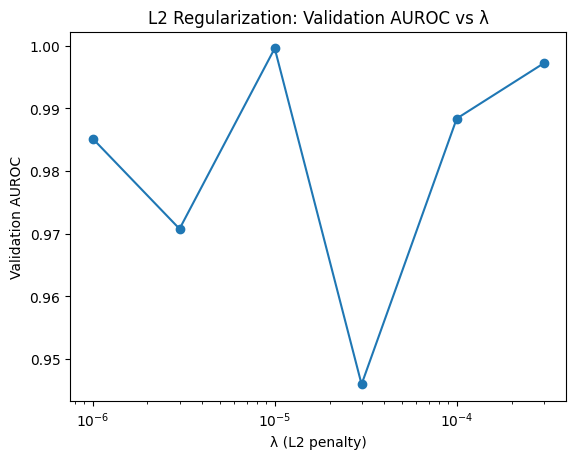

In [59]:
def train_with_L2(model, X_train_t, y_train_t, X_val_t, y_val_t, lam, patience=50, lr=0.01):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=lam)

    best_val_loss = float("inf")
    best_weights = None
    wait = 0

    for epoch in range(200):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_t)
        loss = criterion(y_pred, y_train_t)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val_t)
            val_loss = criterion(y_val_pred, y_val_t)

        if val_loss.item() < best_val_loss - 1e-4:
            best_val_loss = val_loss.item()
            best_weights = model.state_dict()
            wait = 0
        else:
            wait += 1
            if wait >= patience:
              
                print(f"Early stopping at epoch {epoch} for λ={lam}")
                break

    model.load_state_dict(best_weights)
    model.eval()
    with torch.no_grad():
        val_pred_logits = model(X_val_t)
        val_auc = roc_auc_score(y_val_t.numpy(), torch.sigmoid(val_pred_logits).numpy())
    return model, val_auc



val_aucs = []
for lam in lambdas:
    model = MLP()
    _, auc = train_with_L2(model, X_train_t, y_train_t, X_val_t, y_val_t, lam)
    val_aucs.append(auc)
    print(f"λ = {lam:.0e} | Validation AUROC = {auc:.4f}")

best_index = np.argmax(val_aucs)
best_lambda = lambdas[best_index]
print(f"\nBest λ = {best_lambda} with Validation AUROC = {val_aucs[best_index]:.4f}")


import matplotlib.pyplot as plt

plt.semilogx(lambdas, val_aucs, marker='o')
plt.xlabel("λ (L2 penalty)")
plt.ylabel("Validation AUROC")
plt.title("L2 Regularization: Validation AUROC vs λ")
plt.show()


In [60]:
def poly_features_tensor(X):
    x1, x2 = X[:, 0].unsqueeze(1), X[:, 1].unsqueeze(1)
    X_poly = torch.cat([x1, x2, x1 * x2, x1 ** 2, x2 ** 2], dim=1)
    return X_poly


# Polynomial features for all splits
X_train_poly = poly_features_tensor(X_train_t)
X_val_poly = poly_features_tensor(X_val_t)
X_test_01_poly = poly_features_tensor(X_test_01_t)
X_test_03_poly = poly_features_tensor(X_test_03_t)


class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)


torch.manual_seed(1337)

model = LogisticRegression(X_train_poly.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

best_val_auc = 0
patience, wait = 50, 0

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_poly)
    loss = criterion(y_pred, y_train_t)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_poly)
        val_auc = roc_auc_score(
            y_val_t.detach().numpy(),
            torch.sigmoid(val_pred).detach().numpy()
        )

    if val_auc > best_val_auc + 1e-4:  # small tolerance
        best_val_auc = val_auc
        best_state = model.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

model.load_state_dict(best_state)
print(f"Validation AUROC (Logistic Regression with Poly Features): {best_val_auc:.4f}")


model.eval()
with torch.no_grad():
    test_pred_01 = model(X_test_01_poly)
    test_pred_03 = model(X_test_03_poly)
    test_auc_01 = roc_auc_score(y_test_01_t.numpy(), torch.sigmoid(test_pred_01).numpy())
    test_auc_03 = roc_auc_score(y_test_03_t.numpy(), torch.sigmoid(test_pred_03).numpy())

print(f"Test AUROC (Noise=0.10): {test_auc_01:.4f}")
print(f"Test AUROC (Noise=0.30): {test_auc_03:.4f}")


Validation AUROC (Logistic Regression with Poly Features): 0.9984
Test AUROC (Noise=0.10): 1.0000
Test AUROC (Noise=0.30): 0.9969


In [61]:

def evaluate_model(model, X_test, y_test, description="Model"):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        acc = accuracy(y_test, y_pred)
    print(f"{description} Accuracy: {acc:.3f}")
    return acc




print("\n=== Test Accuracy Evaluation ===")

# --- MLP trained with early stopping ---
print("MLP (noise=0.1 test)",acc_test_01)
print("MLP (noise=0.2 test)",acc_test_02)

print("MLP (noise=0.3 test)",acc_test_03)

# --- L1 model ---
best_l1_model, _ = train_with_L1(MLP(), X_train_t, y_train_t, X_val_t, y_val_t, best_lambda)
evaluate_model(best_l1_model, X_test_01_t, y_test_01_t, "MLP L1 Robustness (noise=0.1)")

evaluate_model(best_l1_model, X_test_t, y_test_t, "MLP L1 (noise=0.2 test)")
evaluate_model(best_l1_model, X_test_03_t, y_test_03_t, "MLP L1 Robustness (noise=0.3)")

# --- L2 model ---
best_l2_model, _ = train_with_L2(MLP(), X_train_t, y_train_t, X_val_t, y_val_t, best_lambda)
evaluate_model(best_l2_model, X_test_01_t, y_test_01_t, "MLP L2 (noise=0.1 test)")

evaluate_model(best_l2_model, X_test_t, y_test_t, "MLP L2 (noise=0.2 test)")
evaluate_model(best_l2_model, X_test_03_t, y_test_03_t, "MLP L2 Robustness (noise=0.3)")

# --- Logistic Regression with polynomial features ---
X_test_poly = poly_features_tensor(X_test_t)
X_test_01_poly = poly_features_tensor(X_test_01_t)
X_test_03_poly = poly_features_tensor(X_test_03_t)

evaluate_model(model, X_test_01_poly, y_test_01_t, "Logistic Regression Robustness (noise=0.1)")
evaluate_model(model, X_test_poly, y_test_t, "Logistic Regression (noise=0.2 test)")
evaluate_model(model, X_test_03_poly, y_test_03_t, "Logistic Regression Robustness (noise=0.3)")



=== Test Accuracy Evaluation ===
MLP (noise=0.1 test) 0.906000018119812
MLP (noise=0.2 test) 0.8880000114440918
MLP (noise=0.3 test) 0.906000018119812
MLP L1 Robustness (noise=0.1) Accuracy: 0.916
MLP L1 (noise=0.2 test) Accuracy: 0.892
MLP L1 Robustness (noise=0.3) Accuracy: 0.902
MLP L2 (noise=0.1 test) Accuracy: 0.908
MLP L2 (noise=0.2 test) Accuracy: 0.890
MLP L2 Robustness (noise=0.3) Accuracy: 0.886
Logistic Regression Robustness (noise=0.1) Accuracy: 0.984
Logistic Regression (noise=0.2 test) Accuracy: 0.982
Logistic Regression Robustness (noise=0.3) Accuracy: 0.962


0.9620000123977661

In [62]:

def evaluate_model(model, X_test, y_test, description="Model"):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        acc = accuracy(y_test, y_pred)
    print(f"{description} Accuracy: {acc:.3f}")
    return acc

def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print("\n=== Test Accuracy Evaluation ===")

# --- MLP trained with early stopping ---
acc_mlp_es_01 = acc_test_01
acc_mlp_es_02 = acc_test_02
acc_mlp_es_03 = acc_test_03
params_mlp_es = count_params(model)


# --- L1 model ---
best_l1_model, _ = train_with_L1(MLP(), X_train_t, y_train_t, X_val_t, y_val_t, best_lambda)
acc_l1_01 = evaluate_model(best_l1_model, X_test_01_t, y_test_01_t, "MLP L1 (noise=0.1)")
acc_l1_02 = evaluate_model(best_l1_model, X_test_t, y_test_t, "MLP L1 (noise=0.2)")
acc_l1_03 = evaluate_model(best_l1_model, X_test_03_t, y_test_03_t, "MLP L1 (noise=0.3)")
params_l1 = count_params(best_l1_model)


# --- L2 model ---
best_l2_model, _ = train_with_L2(MLP(), X_train_t, y_train_t, X_val_t, y_val_t, best_lambda)
acc_l2_01 = evaluate_model(best_l2_model, X_test_01_t, y_test_01_t, "MLP L2 (noise=0.1)")
acc_l2_02 = evaluate_model(best_l2_model, X_test_t, y_test_t, "MLP L2 (noise=0.2)")
acc_l2_03 = evaluate_model(best_l2_model, X_test_03_t, y_test_03_t, "MLP L2 (noise=0.3)")
params_l2 = count_params(best_l2_model)


# --- Logistic Regression with polynomial features ---
X_test_poly = poly_features_tensor(X_test_t)
X_test_01_poly = poly_features_tensor(X_test_01_t)
X_test_03_poly = poly_features_tensor(X_test_03_t)

acc_log_01 = evaluate_model(model, X_test_01_poly, y_test_01_t, "Logistic Regression (noise=0.1)")
acc_log_02 = evaluate_model(model, X_test_poly, y_test_t, "Logistic Regression (noise=0.2)")
acc_log_03 = evaluate_model(model, X_test_03_poly, y_test_03_t, "Logistic Regression (noise=0.3)")
params_log = count_params(model)




results_df = pd.DataFrame({
    "Model": [
        "MLP (Early Stopping)",
        "MLP (L1 Reg)",
        "MLP (L2 Reg)",
        "Logistic Regression (Poly)"
    ],
    "Params": [params_mlp_es, params_l1, params_l2, params_log],
    "Accuracy (Noise=0.10)": [acc_mlp_es_01, acc_l1_01, acc_l2_01, acc_log_01],
    "Accuracy (Noise=0.20)": [acc_mlp_es_02, acc_l1_02, acc_l2_02, acc_log_02],
    "Accuracy (Noise=0.30)": [acc_mlp_es_03, acc_l1_03, acc_l2_03, acc_log_03],
})

results_df = results_df.round(4)

print("\n=== Test Accuracy Summary Table ===")
print(results_df.to_string(index=False))



=== Test Accuracy Evaluation ===
MLP L1 (noise=0.1) Accuracy: 0.950
MLP L1 (noise=0.2) Accuracy: 0.936
MLP L1 (noise=0.3) Accuracy: 0.948
MLP L2 (noise=0.1) Accuracy: 0.950
MLP L2 (noise=0.2) Accuracy: 0.904
MLP L2 (noise=0.3) Accuracy: 0.916
Logistic Regression (noise=0.1) Accuracy: 0.984
Logistic Regression (noise=0.2) Accuracy: 0.982
Logistic Regression (noise=0.3) Accuracy: 0.962

=== Test Accuracy Summary Table ===
                     Model  Params  Accuracy (Noise=0.10)  Accuracy (Noise=0.20)  Accuracy (Noise=0.30)
      MLP (Early Stopping)       6                  0.906                  0.888                  0.906
              MLP (L1 Reg)      33                  0.950                  0.936                  0.948
              MLP (L2 Reg)      33                  0.950                  0.904                  0.916
Logistic Regression (Poly)       6                  0.984                  0.982                  0.962


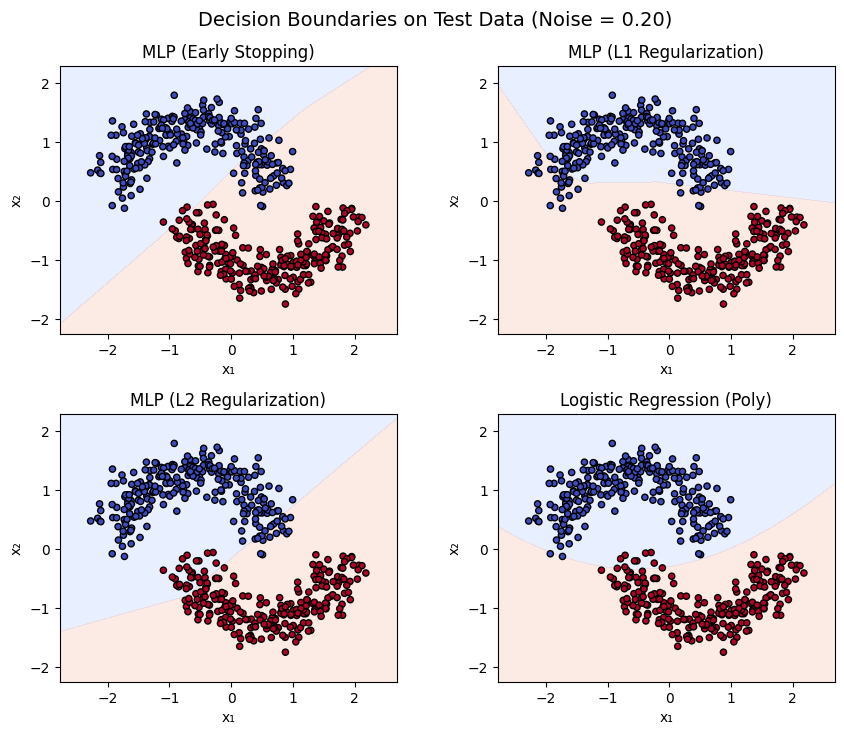

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch


def plot_decision_boundary(model, X, y, title, poly=False):
    model.eval()
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_t = torch.tensor(grid, dtype=torch.float32)

    # Apply polynomial expansion for logistic regression
    if poly:
        grid_t = poly_features_tensor(grid_t)

    with torch.no_grad():
        preds = model(grid_t)
        preds = torch.sigmoid(preds).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.2, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=20)
    plt.title(title)
    plt.xlabel("x₁")
    plt.ylabel("x₂")



X_plot = X_test_t.detach().numpy()
y_plot = y_test_t.detach().numpy()


fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# --- MLP (Early Stopping)
plt.sca(axs[0, 0])
plot_decision_boundary(model_es, X_plot, y_plot, "MLP (Early Stopping)")

# --- MLP L1
plt.sca(axs[0, 1])
plot_decision_boundary(best_l1_model, X_plot, y_plot, "MLP (L1 Regularization)")

# --- MLP L2
plt.sca(axs[1, 0])
plot_decision_boundary(best_l2_model, X_plot, y_plot, "MLP (L2 Regularization)")

# --- Logistic Regression (Polynomial)
plt.sca(axs[1, 1])
plot_decision_boundary(model, X_plot, y_plot, "Logistic Regression (Poly)", poly=True)

plt.suptitle("Decision Boundaries on Test Data (Noise = 0.20)", fontsize=14, y=0.95)
plt.show()


4. 
1. Effect of L1 Regularization 
 Sparsity
•	L1 encourages sparsity in the weight parameters because it penalizes the absolute values of weights.
•	Mathematically, the L1 penalty has a sharp corner at zero, which makes it more likely for optimization to drive some weights exactly to zero.
•	In MLPs, this means:
o	Many neurons may effectively “turn off” (their incoming weights go to zero).
o	The model learns a simpler, more interpretable representation.
o	You can measure this using layer wise sparsity = (number of zero weights / total weights).
Observation you’ll see:
•	As λ (L1 strength) increases:
o	Validation AUROC might initially improve (less overfitting),
o	But beyond a point, too much sparsity → underfitting → lower AUROC.
•	Middle-range λ gives best balance between simplicity and performance.
________________________________________
 Boundary Jaggedness
•	Because many weights become zero, the learned function becomes piecewise linear with sharp changes.
•	This can make decision boundaries jagged or non-smooth, especially in nonlinear regions.
•	The model may “cut corners” to fit data with fewer active neurons, leading to sharp bends in the decision surface.

 2. Effect of L2 
Smoothness
•	L2 penalizes large weights but does not drive them to zero (it shrinks all weights uniformly).
•	This encourages distributed representations, where all neurons contribute moderately.
•	The resulting decision boundary is smoother and less sensitive to noise.
Observation:
•	As λ (L2 strength) increases:
o	Model generalizes better and avoids overfitting.
o	However, too high λ → overly smooth boundary → underfitting.
•	You’ll typically see a U-shaped curve in validation AUROC vs. λ.
________________________________________
 Margin
•	In linear or near-linear models, L2 regularization effectively maximizes the margin between classes (similar to SVM behavior).
•	It encourages the classifier to place the decision boundary farther from the closest points while maintaining overall smoothness.


In [ ]:
#5th

from sklearn.utils import resample

def spliting_with_imbalance(i, imbalance_ratio=0.7):
    x = i.iloc[:, :-1]
    y = i["label"]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state=1337, stratify=y)

    # Combine train features + labels
    train_data = pd.concat([xtrain, ytrain], axis=1)
    class_0 = train_data[train_data["label"] == 0]
    class_1 = train_data[train_data["label"] == 1]

    
    if len(class_0) > len(class_1):
        majority_class = class_0
        minority_class = class_1
    else:
        majority_class = class_1
        minority_class = class_0

    total = len(train_data)
    n_majority = int(imbalance_ratio * total)
    n_minority = total - n_majority

    majority_sample = resample(majority_class, 
                               replace=(n_majority > len(majority_class)), 
                               n_samples=n_majority, 
                               random_state=1337)
    minority_sample = resample(minority_class, 
                               replace=(n_minority > len(minority_class)), 
                               n_samples=n_minority, 
                               random_state=1337)

    train_imbalanced = pd.concat([majority_sample, minority_sample]).sample(frac=1, random_state=1337)

    # Validation split
    xtrain = train_imbalanced.iloc[:, :-1]
    ytrain = train_imbalanced["label"]
    xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=1337)

    # Scaling using train stats
    scaler = StandardScaler()
    xtrain_scaled = scaler.fit_transform(xtrain)
    xval_scaled = scaler.transform(xval)
    xtest_scaled = scaler.transform(xtest)

    # Convert to tensors
    X_train_t = torch.tensor(xtrain_scaled, dtype=torch.float32)
    y_train_t = torch.tensor(ytrain.values, dtype=torch.float32).view(-1, 1)
    X_val_t = torch.tensor(xval_scaled, dtype=torch.float32)
    y_val_t = torch.tensor(yval.values, dtype=torch.float32).view(-1, 1)
    X_test_t = torch.tensor(xtest_scaled, dtype=torch.float32)
    y_test_t = torch.tensor(ytest.values, dtype=torch.float32).view(-1, 1)

    return X_train_t, y_train_t, X_val_t, y_val_t, X_test_t, y_test_t


X_train_imb, y_train_imb, X_val_imb, y_val_imb, X_test_bal, y_test_bal = spliting_with_imbalance(df_n_point_two)

model_imb = MLP(input_dim=2, hidden_dim=8)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_imb.parameters(), lr=0.01)

best_val_loss = float("inf")
wait, patience = 0, 50
for epoch in range(200):
    model_imb.train()
    optimizer.zero_grad()
    y_pred = model_imb(X_train_imb)
    loss = criterion(y_pred, y_train_imb)
    loss.backward()
    optimizer.step()

    model_imb.eval()
    with torch.no_grad():
        val_pred = model_imb(X_val_imb)
        val_loss = criterion(val_pred, y_val_imb)

    if val_loss.item() < best_val_loss - 1e-4:
        best_val_loss = val_loss.item()
        best_weights = model_imb.state_dict()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            break

model_imb.load_state_dict(best_weights)

from sklearn.metrics import roc_auc_score

def evaluate_metrics(model, X, y, name="Model"):
    model.eval()
    with torch.no_grad():
        y_logits = model(X)
        y_probs = torch.sigmoid(y_logits).numpy()
        y_true = y.numpy()
        preds = (y_probs > 0.5).astype(int)
        acc = accuracy_score(y_true, preds)
        auc = roc_auc_score(y_true, y_probs)
    print(f"{name}: Accuracy = {acc:.3f}, AUROC = {auc:.3f}")
    return acc, auc

evaluate_metrics(model_imb, X_test_bal, y_test_bal, "MLP (Trained with 70:30 Imbalance, Tested on Balanced 0.2 Noise)")



MLP (Trained with 70:30 Imbalance, Tested on Balanced 0.2 Noise): Accuracy = 0.760, AUROC = 0.997


(0.76, 0.996816)